## Problem:
Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

### Detaylar:
- Web sitemizden elde edilen verilere göre, ziyaretçilerin sitede geçirdiği ortalama süre 170 saniye olarak ölçülmüştür.
- Ancak, bir yöneticimiz veya çalışanımız bu ortalama sürenin doğru olmadığına dair şüpheler taşımaktadır.
- Bu durumun doğruluğunu test etmek ve ortalama sürenin gerçekten 170 saniye olup olmadığını belirlemek istiyoruz.
lar.

# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

### Hipotezler:

#### 1. İki yönlü test:
- $ H_0: \mu = 50 $
- $ H_1: \mu \neq 50 $

#### 2. Tek yönlü test (üst sınır):
- $ H_0: \mu \leq 50 $
- $ H_1: \mu > 50 $

#### 3. Tek yönlü test (alt sınır):
- $ H_0: \mu \geq 50 $
- $ H_1: \mu < 50 $

### Test İstatistiği:

$$
t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}}
$$


In [14]:
import numpy as np
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146, 203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [16]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [18]:
import scipy.stats as stats

In [20]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

### Varsayımlar
### Normallik Varsayımı

In [25]:
import pandas as pd

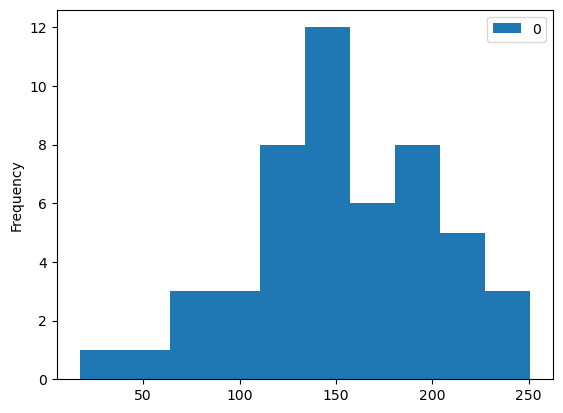

In [29]:
#Histogram
pd.DataFrame(olcumler).plot.hist();

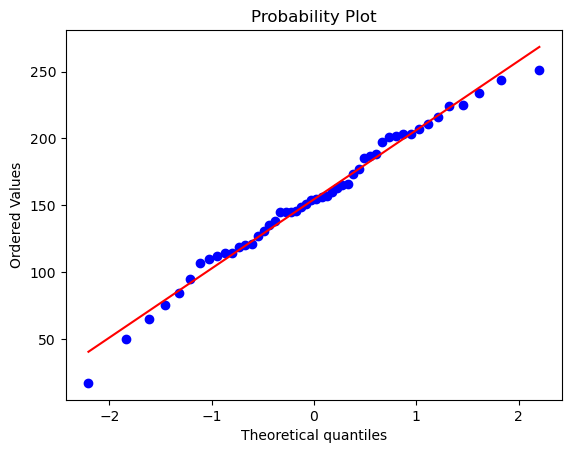

In [31]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm",plot=pylab)
pylab.show()

# Shapiro-Wilks Testi

Shapiro-Wilks Testi, bir örneklem verisinin normal dağılıma uyup uymadığını test etmek için kullanılır. Özellikle küçük örneklem boyutlarında etkilidir ve dağılımın normal olup olmadığını kontrol etmek amacıyla tercih edilir.

### Hipotezler:
- **Null Hipotezi ($H_0$):** Veri seti normal dağılıma uygundur.
- **Alternatif Hipotez ($H_1$):** Veri seti normal dağılıma uygun değildir.

### Test Sonucu:
- p-değeri belirlenen anlamlılık düzeyinden küçükse, $H_0$ reddedilir (Veri seti normal dağılıma uymamaktadır).
- p-değeri büyükse, $H_0$ reddedilmez (Veri seti normal dağılıma uymaktadır).

Shapiro-Wilks Testi, veri analizinde normal dağılıma uygunluk kontrolü için güçlü bir yöntemdir.


## H0: Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.
## H1: .... fark vardır.

In [37]:
from scipy.stats import shapiro

In [39]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853103897061022, pvalue=0.7848671719373956)

In [42]:
print("T Hesap İstatistiği: " + str(shapiro (olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro (olcumler) [1]))

T Hesap İstatistiği: 0.9853103897061022
Hesaplanan P-value: 0.7848671719373956


#### H0 hipotezini reddedemeyiz çünkü p-value değeri > 0.05 bu durumda H0 reddedilmedi. 

### Varsayım sağlandığına göre Hipotez Tezini uygulayabiliriz.

In [47]:
stats.ttest_1samp(olcumler, popmean=170)

TtestResult(statistic=-2.1753117985877966, pvalue=0.03446041519507144, df=49)

### p-value değeri: 0.03 < 0.05 bu yüzden H0 hipotezi reddedilir. 

#### Yorum: Web sitesinde geçirilen ort süre 170 den küçüktür. (örnekte ort için 150 demişti)